In [63]:
import keras
import numpy as np

In [64]:
from keras.layers import Input,Conv2D, Dense, Flatten, MaxPooling2D

In [65]:
from keras import Sequential, Model

In [66]:
from keras.layers import concatenate

In [135]:
#a basic inception block
def basic_inception_block(input_layer, f1,f3,f5):
    conv1=Conv2D(
        filters=f1,
        kernel_size=(1,1),
        padding='same',
        activation='relu'
    )(input_layer)
    
    
    
    conv3=Conv2D(
        filters=f3,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    )(input_layer)
    
    
    
    
    conv5=Conv2D(
        filters=f5,
        kernel_size=(5,5),
        padding='same',
        activation='relu'
    )(input_layer)
    
    
    pooling=MaxPooling2D(
        (3,3),
        strides=(1,1),
        padding='same'
    )(input_layer)
    
    
    output_layer=concatenate([conv1,conv3,conv5,pooling], axis=3)
    
    return output_layer 
    
    

In [136]:
input_layer=Input(shape=(32,32,3))
iblock1=basic_inception_block(input_layer, 64, 128,32)


flat=Flatten()(iblock1)

dense1= Dense(60, activation='relu')(flat)
dense2= Dense(10, activation='softmax')(dense1)

model = Model(inputs=input_layer, outputs=dense2)

In [138]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_26 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_111 (Conv2D)            (None, 32, 32, 64)   256         ['input_26[0][0]']               
                                                                                                  
 conv2d_112 (Conv2D)            (None, 32, 32, 128)  3584        ['input_26[0][0]']               
                                                                                                  
 conv2d_113 (Conv2D)            (None, 32, 32, 32)   2432        ['input_26[0][0]']               
                                                                                            

In [68]:
# inception model with dimension reduction; less parameters using 1x1 convolutions
def reduced_dimension_inception_block(input_layer, f1, f3_in, f3_out, f5_in, f5_out, pool_out):
    
    conv1=Conv2D(
        filters=f1,
        kernel_size=(1,1),
        padding='same',
        activation='relu'
    )(input_layer)
    
    
    
    conv3=Conv2D(
        filters=f3_in,
        kernel_size=(1,1),
        padding='same',
        activation='relu'
    )(input_layer)
    
    conv3=Conv2D(
        filters=f3_out,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    )(conv3)
    
    
    
    
    conv5=Conv2D(
        filters=f5_in,
        kernel_size=(1,1),
        padding='same',
        activation='relu'
    )(input_layer)
    
    conv5=Conv2D(
        filters=f5_out,
        kernel_size=(5,5),
        padding='same',
        activation='relu'
    )(conv5)
    
    
    
    
    pooling=MaxPooling2D(
        (3,3),
        strides=(1,1),
        padding='same',
    )(input_layer)
    
    pooling=Conv2D(
        filters=pool_out,
        kernel_size=(1,1),
        padding='same',
        activation='relu'
    )(pooling)
    
    
    
    output_layer=concatenate([conv1,conv3,conv5,pooling], axis=3) #axis 3 is the concatenation axis
    
    return output_layer
    
    
    
   

In [117]:
import glob
from PIL import Image
from matplotlib import pyplot as plt
from random import shuffle
import cv2

train_files=glob.glob("C:/Users/Rohan/GitHubstuff/test_git/CNN-implementation-of-reasearch-models/fingers/train/*")
shuffle(train_files)

X_train=np.zeros((len(train_files),32,32,3))
Y_train=np.zeros((len(train_files)))

for i,fl in enumerate(train_files):
    image = cv2.imread(fl)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    backtorgb = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
    
    backtorgb = cv2.resize(backtorgb,(32,32))
    backtorgb= backtorgb/255
    
    
    X_train[i,:,:,:]=backtorgb
        
    Y_train[i]=fl[-6]
    

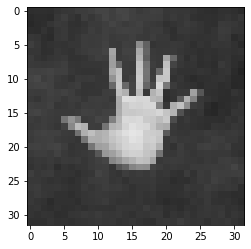

In [116]:
plt.imshow(X_train[1])

(32, 32, 3)


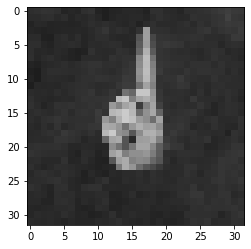

In [92]:
fl=train_files[3]
import cv2
image = cv2.imread(fl)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
backtorgb = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
backtorgb= cv2.resize(backtorgb,(32,32))
print(np.array(backtorgb).shape)
plt.imshow(backtorgb)

In [119]:
input_layer=Input(shape=(32,32,3))
iblock1= reduced_dimension_inception_block(input_layer, 64, 64, 128, 16, 32, 32)


flat=Flatten()(iblock1)

dense1= Dense(60, activation='relu')(flat)
dense2= Dense(10, activation='softmax')(dense1)

model = Model(inputs=input_layer, outputs=dense2)

In [120]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_103 (Conv2D)            (None, 32, 32, 64)   256         ['input_23[0][0]']               
                                                                                                  
 conv2d_105 (Conv2D)            (None, 32, 32, 16)   64          ['input_23[0][0]']               
                                                                                                  
 max_pooling2d_15 (MaxPooling2D  (None, 32, 32, 3)   0           ['input_23[0][0]']               
 )                                                                                          

In [121]:
model.compile(
    optimizer= keras.optimizers.Adam(learning_rate=0.001),
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [122]:
model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    epochs=3)

Epoch 1/3
450/450 [==============================] - 82s 181ms/step - loss: 0.1888 - accuracy: 0.9524 - val_loss: 0.0046 - val_accuracy: 0.9994
Epoch 2/3
450/450 [==============================] - 97s 216ms/step - loss: 0.0116 - accuracy: 0.9972 - val_loss: 0.0028 - val_accuracy: 0.9989
Epoch 3/3
450/450 [==============================] - 101s 225ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 8.2248e-04 - val_accuracy: 0.9997


In [123]:
test_files=glob.glob("C:/Users/Rohan/GitHubstuff/test_git/CNN-implementation-of-reasearch-models/fingers/test/*")


X_test=np.zeros((len(test_files),32,32,3))
Y_test=np.zeros((len(test_files)))

for i,fl in enumerate(test_files):
    image = cv2.imread(fl)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    backtorgb = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
    
    backtorgb = cv2.resize(backtorgb,(32,32))
    backtorgb= backtorgb/255
    
    
    X_test[i,:,:,:]=backtorgb
        
    Y_test[i]=fl[-6]
    

In [124]:
model.evaluate(X_test, Y_test)

113/113 [==============================] - 5s 43ms/step - loss: 0.0013 - accuracy: 0.9997


[0.0012923515168949962, 0.9997222423553467]

In [125]:
predictions= model.predict(X_test)

113/113 [==============================] - 5s 43ms/step


model says this is 5


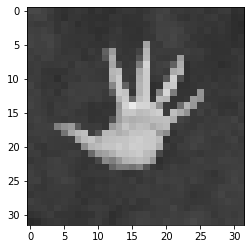

In [129]:
x=0
plt.imshow(X_test[x])
print("model says this is", np.argmax(predictions[x]))

model says this is 3


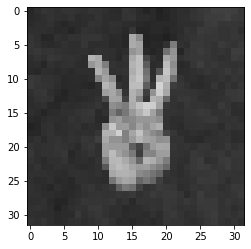

In [131]:
x=2
plt.imshow(X_test[x])
print("model says this is", np.argmax(predictions[x]))